In [51]:
from tensorflow import keras
import numpy as np
import pandas as pd

## Load data
lrData = pd.read_csv("sc.sample.tsv", delimiter='\t', keep_default_na=False)

print("read data: " +str(len(lrData)))

print(lrData)

x_data = np.array(lrData[['x1', 'x2']], dtype=np.float64)
y_data = np.array(lrData['label'], dtype=np.float64)

read data: 10000
      index        x1        x2  label
0         1 -0.889268 -0.471277      1
1         2 -0.947695  0.000000      0
2         3 -0.877700  0.000000      0
3         4  0.000000  0.140096      0
4         5  0.000000 -0.761773      0
...     ...       ...       ...    ...
9995   9996  0.654160  0.716796      0
9996   9997 -0.183493  0.780246      0
9997   9998  0.000000  0.948636      0
9998   9999  0.000000 -0.049655      0
9999  10000  0.000000 -0.659046      0

[10000 rows x 4 columns]


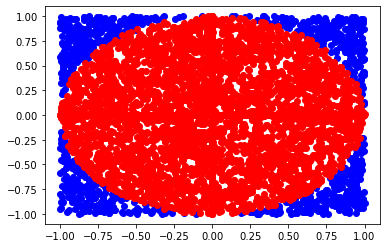

In [55]:
import matplotlib.pyplot as plt
import math
plt.plot(x_data[y_data == 1, 0], x_data[y_data == 1, 1], 'bo')
plt.plot(x_data[y_data == 0, 0], x_data[y_data == 0, 1], 'ro')
plt.show()

## convert to x1^2 and x2^2
x_data = x_data * x_data

In [58]:
## Compose model
keras.backend.clear_session()
model = keras.models.Sequential()
model.add(keras.layers.Dense(units=1, input_dim=2, activation='sigmoid'))

sgd = keras.optimizers.SGD(learning_rate = 1e-1)
model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=['binary_accuracy'])

history = model.fit(x_data, y_data, epochs = 20, batch_size = 1, shuffle=False, verbose = 1, validation_split = 0.2)

model.summary()

Epoch 1/20
8000/8000 [==============================] - 2s 296us/step - loss: 0.1237 - binary_accuracy: 0.9529 - val_loss: 0.0788 - val_binary_accuracy: 0.9640
Epoch 2/20
8000/8000 [==============================] - 2s 290us/step - loss: 0.0722 - binary_accuracy: 0.9775 - val_loss: 0.0629 - val_binary_accuracy: 0.9710
Epoch 3/20
8000/8000 [==============================] - 2s 291us/step - loss: 0.0605 - binary_accuracy: 0.9824 - val_loss: 0.0553 - val_binary_accuracy: 0.9745
Epoch 4/20
8000/8000 [==============================] - 2s 294us/step - loss: 0.0541 - binary_accuracy: 0.9847 - val_loss: 0.0506 - val_binary_accuracy: 0.9775
Epoch 5/20
8000/8000 [==============================] - 2s 296us/step - loss: 0.0497 - binary_accuracy: 0.9860 - val_loss: 0.0473 - val_binary_accuracy: 0.9795
Epoch 6/20
8000/8000 [==============================] - 2s 308us/step - loss: 0.0465 - binary_accuracy: 0.9870 - val_loss: 0.0448 - val_binary_accuracy: 0.9800
Epoch 7/20
8000/8000 [==================

In [57]:
model.evaluate(x_data, y_data, batch_size= 1, verbose=1)

10000/10000 [==============================] - 2s 230us/step - loss: 0.0390 - binary_accuracy: 0.9842


[0.03900257498025894, 0.9842000007629395]